In [23]:
# wir benötigen wieder ein paar python imports...
import sys
from os import environ
import os
import time
import uuid
sys.path.append(os.path.abspath(".."))

from sparql_queries import *
from connector_client import ConnectorClient
from connector.messages.datamodel_utils import SubscriptionRegisterRequest, SubscriptionUnregisterRequest # generic messages within the connector_base repo

client = ConnectorClient(bootstrap_servers=[environ.get("KAFKA_BROKER")])

In [24]:
# graphdb queries, um den richtigen connector zu identifizieren
await client.load_connector_config()
await client.return_connectors()

dict_keys(['milling_station', 'injection_molding', 'assembly_station'])

In [25]:
# wechsel an den ausgewählten, richtigen connector
await client.switch_connector('milling_station')

In [4]:
# definieren einer Subscribe-Nachricht für einen OPC-UA-Server, welche bereits als pydantic model oder als json schema gegeben ist
subscription_id = uuid.uuid4()
print(f"Subscription Identifier: {subscription_id}")
example_subscribe_payload = SubscriptionRegisterRequest(
    datapoint_identifier=["ns=2;i=62"],
    device_origin="client",
    subscription_identifier=subscription_id
)

Subscription Identifier: 1b71715e-5f65-4778-8b24-9e818de2c502


In [5]:
# senden der Nachricht und darstellen der Rückmeldung
output = await client.subscribe_data_source(base_payload=example_subscribe_payload)

Correlation_id of sent message: 0ea13e7e-a8a1-4dda-88a4-1efa44af0947
waiting for a message
Received message
{'correlation_id': '0ea13e7e-a8a1-4dda-88a4-1efa44af0947',
 'message_id': '1a66487c-ad65-45eb-bd4e-59e7946fc6ee',
 'payload': {'base_payload': {'device_origin': 'connector_opcua',
                              'response': 'Worked',
                              'type': 'SubscriptionRegisterResponse'},
             'type': 'CommandResponse'},
 'service_id': 'milling_station',
 'status_code': 'Valid',
 'timestamp': '2025-04-29T11:42:14.061852',
 'type': 'ResponseMessage',
 'version': '1.0.0'}
message type: <class 'connector.messages.datamodel_utils.SubscriptionRegisterResponse'>
Matching response received:
{
    "type": "SubscriptionRegisterResponse",
    "device_origin": "connector_opcua",
    "response": "Worked"
}


In [6]:
start_time = time.time()
for idx in range(100):
    # load test
    # definieren einer Subscribe-Nachricht für einen OPC-UA-Server, welche bereits als pydantic model oder als json schema gegeben ist
    subscription_id = uuid.uuid4()
    print(f"Subscription Identifier: {subscription_id}")
    example_subscribe_payload = SubscriptionRegisterRequest(
        datapoint_identifier=["ns=2;i=62"],
        device_origin="client",
        subscription_identifier=subscription_id
    )
    # senden der Nachricht und darstellen der Rückmeldung
    output = await client.subscribe_data_source(base_payload=example_subscribe_payload)
end_time = time.time() - start_time

Subscription Identifier: 73b40eaf-4c2b-4d04-b90a-5dbd6498cdf0
Correlation_id of sent message: 0bc17153-3350-4011-82d2-437ff1e49557
waiting for a message
Received message
{'correlation_id': '0bc17153-3350-4011-82d2-437ff1e49557',
 'message_id': '6b304643-9bc9-4e8c-b05c-0d7f10cf292c',
 'payload': {'base_payload': {'device_origin': 'connector_opcua',
                              'response': 'Worked',
                              'type': 'SubscriptionRegisterResponse'},
             'type': 'CommandResponse'},
 'service_id': 'milling_station',
 'status_code': 'Valid',
 'timestamp': '2025-04-29T11:42:14.952779',
 'type': 'ResponseMessage',
 'version': '1.0.0'}
message type: <class 'connector.messages.datamodel_utils.SubscriptionRegisterResponse'>
Matching response received:
{
    "type": "SubscriptionRegisterResponse",
    "device_origin": "connector_opcua",
    "response": "Worked"
}
Subscription Identifier: 3fdb542f-2442-4c21-8a97-20575dba6ba9
Correlation_id of sent message: c43be332-8d

In [20]:
import time

async def query_performance_test():
    start_time = time.time()
    while True:
        try:
            out = await client.query_graphdb(build_subscription_by_id_query(str(subscription_id)), pretty=False)
    
            if out and len(out)>0:
                break
    
        except Exception:
            pass
    
    end_time = time.time()
    time.sleep(0.1)
    #print(f"Subscription appeared after {end_time - start_time:.3f} seconds.")
    return end_time - start_time

In [21]:
out = await client.query_graphdb(build_subscription_by_id_query(str(subscription_id)))

In [22]:
query_results = []
for idx in range(100):
    result = await query_performance_test()
    query_results.append(result)

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(query_results)

NameError: name 'query_results' is not defined

In [8]:
import time

async def subscription_performance_test():
    start_time = time.time()
    subscription_id = uuid.uuid4()
    print(f"Subscription Identifier: {subscription_id}")
    example_subscribe_payload = SubscriptionRegisterRequest(
        datapoint_identifier=["ns=2;i=62"],
        device_origin="client",
        subscription_identifier=subscription_id
    )
    await client.subscribe_data_source(example_subscribe_payload)
    while True:
        try:
            out = await client.query_graphdb(build_subscription_by_id_query(str(subscription_id)), pretty=False)
    
            if out and len(out)>0:
                break
    
        except Exception:
            pass
    
    end_time = time.time()
    time.sleep(0.1)
    #print(f"Subscription appeared after {end_time - start_time:.3f} seconds.")
    return end_time - start_time

In [25]:
performance_results = []
for idx in range(100):
    result = await subscription_performance_test()
    performance_results.append(result)

Subscription Identifier: 3ac2ee2b-50b7-4780-9119-34a00ca6a564
Correlation_id of sent message: 83490b04-6adf-41eb-85c9-def3b12a1d38
waiting for a message
Received message
{'correlation_id': '83490b04-6adf-41eb-85c9-def3b12a1d38',
 'message_id': 'c4811e62-7125-4e54-b4f4-6139bc7f256a',
 'payload': {'base_payload': {'device_origin': 'connector_opcua',
                              'response': 'Worked',
                              'type': 'SubscriptionRegisterResponse'},
             'type': 'CommandResponse'},
 'service_id': 'milling_station',
 'status_code': 'Valid',
 'timestamp': '2025-04-29T10:59:32.092429',
 'type': 'ResponseMessage',
 'version': '1.0.0'}
message type: <class 'connector.messages.datamodel_utils.SubscriptionRegisterResponse'>
Matching response received:
{
    "type": "SubscriptionRegisterResponse",
    "device_origin": "connector_opcua",
    "response": "Worked"
}
Subscription Identifier: ed1f00d8-ba5b-48af-a111-fd389c36d579
Correlation_id of sent message: 3fbf5228-57

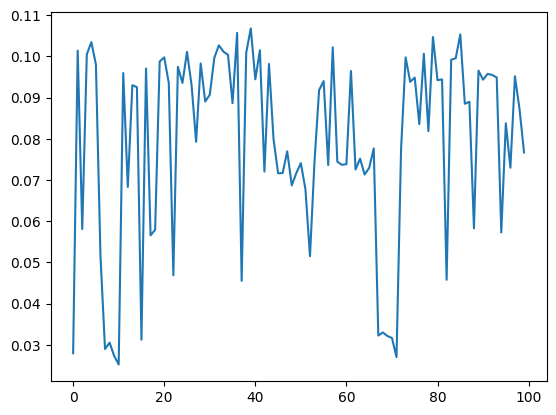

In [26]:
plt.plot(performance_results)

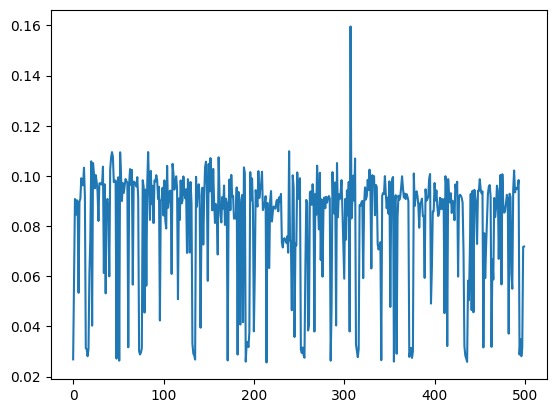

In [21]:
#plt.plot(query_results)
plt.plot(performance_results)

In [11]:
performance_results = []
for idx in range(500):
    result = await subscription_performance_test();
    performance_results.append(result)

Subscription Identifier: 20cf589e-ecda-49a6-bfcf-725ca38e5dc8
Correlation_id of sent message: 98b67f2f-27e5-42ba-a032-992c4042a285
waiting for a message
Received message
{'correlation_id': '98b67f2f-27e5-42ba-a032-992c4042a285',
 'message_id': '9ba8f234-b548-4229-a8ff-c601654b84aa',
 'payload': {'base_payload': {'device_origin': 'connector_opcua',
                              'response': 'Worked',
                              'type': 'SubscriptionRegisterResponse'},
             'type': 'CommandResponse'},
 'service_id': 'milling_station',
 'status_code': 'Valid',
 'timestamp': '2025-04-29T11:42:45.843567',
 'type': 'ResponseMessage',
 'version': '1.0.0'}
message type: <class 'connector.messages.datamodel_utils.SubscriptionRegisterResponse'>
Matching response received:
{
    "type": "SubscriptionRegisterResponse",
    "device_origin": "connector_opcua",
    "response": "Worked"
}
Subscription Identifier: 79dde836-0824-4a54-a9b7-7be5053edebe
Correlation_id of sent message: 760b2349-94

In [18]:
async def request_response_latency_test():
    start_time = time.time()
    subscription_id = uuid.uuid4()
    print(f"Subscription Identifier: {subscription_id}")
    example_subscribe_payload = SubscriptionRegisterRequest(
        datapoint_identifier=["ns=2;i=62"],
        device_origin="client",
        subscription_identifier=subscription_id
    )
    out = await client.subscribe_data_source(example_subscribe_payload)
    end_time = time.time() - start_time
    time.sleep(0.1)
    return end_time

In [19]:
request_response_performance_results = []
for idx in range(100):
    result = await request_response_latency_test()
    request_response_performance_results.append(result)

Subscription Identifier: 681cd21a-caa2-41d5-8818-02b535be0d41
Correlation_id of sent message: 144aa7f9-4cad-4f1a-a7ec-d86063e40ead
waiting for a message
Received message
{'correlation_id': '144aa7f9-4cad-4f1a-a7ec-d86063e40ead',
 'message_id': 'c68fe714-e0dd-4fe0-a13f-4a9f9eb91282',
 'payload': {'base_payload': {'device_origin': 'connector_opcua',
                              'response': 'Worked',
                              'type': 'SubscriptionRegisterResponse'},
             'type': 'CommandResponse'},
 'service_id': 'milling_station',
 'status_code': 'Valid',
 'timestamp': '2025-04-29T11:49:35.040285',
 'type': 'ResponseMessage',
 'version': '1.0.0'}
message type: <class 'connector.messages.datamodel_utils.SubscriptionRegisterResponse'>
Matching response received:
{
    "type": "SubscriptionRegisterResponse",
    "device_origin": "connector_opcua",
    "response": "Worked"
}
Subscription Identifier: b3e9ae49-7f8d-48ac-895b-0367e3b0e508
Correlation_id of sent message: d96771ff-8c

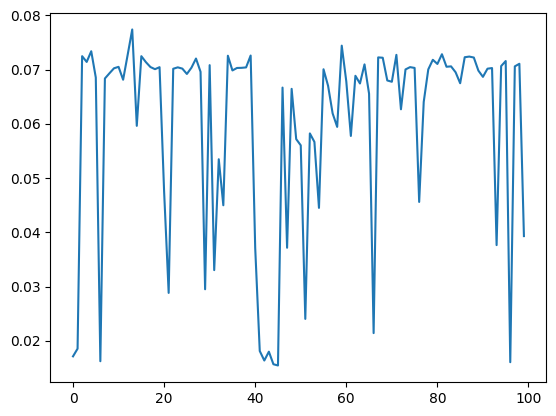

In [22]:
plt.plot(request_response_performance_results)

Multi Client Test